In [3]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.read.csv("Absenteeism_at_work.csv", header=True, inferSchema=True)
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Reason for absence: string (nullable = true)
 |-- Month of absence: string (nullable = true)
 |-- Day of the week: string (nullable = true)
 |-- Seasons: string (nullable = true)
 |-- Transportation expense: integer (nullable = true)
 |-- Distance from Residence to Work: integer (nullable = true)
 |-- Service time: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Work load Average/day : double (nullable = true)
 |-- Hit target: integer (nullable = true)
 |-- Disciplinary failure: boolean (nullable = true)
 |-- Education: string (nullable = true)
 |-- Children: integer (nullable = true)
 |-- Social drinker: boolean (nullable = true)
 |-- Social smoker: boolean (nullable = true)
 |-- Pet: integer (nullable = true)
 |-- Weight: integer (nullable = true)
 |-- Height: integer (nullable = true)
 |-- Body mass index: integer (nullable = true)
 |-- Absenteeism time in hours: integer (nullable = true)



In [5]:
df.count()

740

In [6]:
df.na.drop().count()

740

In [12]:
from pyspark.sql.functions import col
cat_df = df.select(col('Reason for Absence'), 
                   col('Day of the week'),
                   col('Seasons'),
                   col('Disciplinary failure'),
                   col('Education'),
                   col('Social drinker'),
                   col('Social smoker')
                  )
cat_df.show()

+------------------+---------------+-------+--------------------+-----------+--------------+-------------+
|Reason for Absence|Day of the week|Seasons|Disciplinary failure|  Education|Social drinker|Social smoker|
+------------------+---------------+-------+--------------------+-----------+--------------+-------------+
|              XXVI|           TUES| Summer|               false|High School|          true|        false|
|                 0|           TUES| Summer|                true|High School|          true|        false|
|             XXIII|            WED| Summer|               false|High School|          true|        false|
|               VII|          THURS| Summer|               false|High School|          true|         true|
|             XXIII|          THURS| Summer|               false|High School|          true|        false|
|             XXIII|            FRI| Summer|               false|High School|          true|        false|
|              XXII|            FRI| 

In [13]:
cat_df.describe().toPandas()

,summary,Reason for Absence,Day of the week,Seasons,Education
0,count,740,740,740,740
1,mean,0.0,None,None,None
2,stddev,0.0,None,None,None
3,min,0,FRI,Autumn,Doctorate
4,max,XXVIII,WED,Winter,Postgrad


In [8]:
num_df = df.select(col('Transportation expense'),
                  col('Distance from Residence to Work'),
                  col('Service Time'),
                  col('Age'),
                  col('Work load Average/Day '),
                  col('Hit target'),
                  col('Children'),
                  col('Pet'),
                  col('Weight'),
                  col('Height'),
                  col('Body Mass Index'),
                  col('Absenteeism time in hours')
                  )
num_df.show()

+----------------------+-------------------------------+------------+---+----------------------+----------+--------+---+------+------+---------------+-------------------------+
|Transportation expense|Distance from Residence to Work|Service Time|Age|Work load Average/Day |Hit target|Children|Pet|Weight|Height|Body Mass Index|Absenteeism time in hours|
+----------------------+-------------------------------+------------+---+----------------------+----------+--------+---+------+------+---------------+-------------------------+
|                   289|                             36|          13| 33|               239.554|        97|       2|  1|    90|   172|             30|                        4|
|                   118|                             13|          18| 50|               239.554|        97|       1|  0|    98|   178|             31|                        0|
|                   179|                             51|          18| 38|               239.554|        97|       0

In [10]:
num_df.describe().toPandas()

,summary,Transportation expense,Distance from Residence to Work,Service Time,Age,Work load Average/Day,Hit target,Children,Pet,Weight,Height,Body Mass Index,Absenteeism time in hours
0,count,740,740,740,740,740,740,740,740,740,740,740,740
1,mean,221.32972972972973,29.63108108108108,12.554054054054054,36.45,271.49023513513544,94.58783783783784,1.018918918918919,0.745945945945946,79.03513513513514,172.11486486486487,26.677027027027027,6.924324324324324
2,stddev,66.95222324531973,14.836788436739143,4.384873407621148,6.478772457611868,39.058116188144055,3.779313134418015,1.0984890195302817,1.3182582913258336,12.883210507177214,6.034994530267662,4.285452223167274,13.330998100978196
3,min,118,5,1,27,205.917,81,0,0,56,163,19,0
4,max,388,52,29,58,378.884,100,4,8,108,196,38,120


In [19]:
# Look at frequency of Boolean variables
cat_df.groupBy('Social Smoker').count().show()


+-------------+-----+
|Social Smoker|count|
+-------------+-----+
|         true|   54|
|        false|  686|
+-------------+-----+



In [20]:
cat_df.groupBy('Social drinker').count().show()

+--------------+-----+
|Social drinker|count|
+--------------+-----+
|          true|  420|
|         false|  320|
+--------------+-----+



In [26]:
cat_df.groupBy('Reason for Absence').count().show(28)

+------------------+-----+
|Reason for Absence|count|
+------------------+-----+
|              XVII|    1|
|               VII|   15|
|             XXVII|   69|
|               XVI|    3|
|              XIII|   55|
|                 0|   43|
|               XIV|   19|
|               XXV|   31|
|             XXIII|  149|
|               III|    1|
|                IV|    2|
|              XXVI|   33|
|                 V|    3|
|                VI|    8|
|                IX|    4|
|                XV|    2|
|                 X|   25|
|               XIX|   40|
|                II|    1|
|               XXI|    6|
|             XVIII|   21|
|              XXIV|    3|
|              XXII|   38|
|                 I|   16|
|                XI|   26|
|              VIII|    6|
|               XII|    8|
|            XXVIII|  112|
+------------------+-----+



In [27]:
cat_df.groupBy('Seasons').count().show()

+-------+-----+
|Seasons|count|
+-------+-----+
| Spring|  195|
| Summer|  170|
| Autumn|  192|
| Winter|  183|
+-------+-----+



In [28]:
cat_df.groupBy('Day of the Week').count().show()

+---------------+-----+
|Day of the Week|count|
+---------------+-----+
|           TUES|  154|
|            MON|  161|
|          THURS|  125|
|            WED|  156|
|            FRI|  144|
+---------------+-----+



In [32]:
cat_df.groupBy('Education').count().show()

+-----------+-----+
|  Education|count|
+-----------+-----+
|High School|  611|
|   Postgrad|   79|
|  Doctorate|    4|
|   Graduate|   46|
+-----------+-----+



In [35]:
cat_df.groupBy('Disciplinary failure').count().show()

+--------------------+-----+
|Disciplinary failure|count|
+--------------------+-----+
|                true|   40|
|               false|  700|
+--------------------+-----+



In [30]:
# https://stackoverflow.com/questions/51831874/how-to-get-correlation-matrix-values-pyspark
from pyspark.ml.linalg import DenseMatrix, Vectors
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=df.columns, outputCol="features", handleInvalid='keep')
dataframe = assembler.transform(df).select("features")
dataframe.show()

IllegalArgumentException: Data type string of column Reason for absence is not supported.
Data type string of column Month of absence is not supported.
Data type string of column Day of the week is not supported.
Data type string of column Seasons is not supported.
Data type string of column Education is not supported.

In [36]:
# String variables not supported in correlations. Best to remove

new_df = df.select(col('Transportation expense'),
                  col('Distance from Residence to Work'),
                  col('Service Time'),
                  col('Age'),
                  col('Work load Average/Day '),
                  col('Hit target'),
                  col('Children'),
                  col('Pet'),
                  col('Weight'),
                  col('Height'),
                  col('Body Mass Index'),
                  col('Absenteeism time in hours'), col('Social Smoker'), col('Social Drinker'), col('Disciplinary failure'),
                  )

In [37]:
assembler = VectorAssembler(inputCols=new_df.columns, outputCol="features", handleInvalid='keep')
dataframe = assembler.transform(new_df).select("features")
dataframe.show()

+--------------------+
|            features|
+--------------------+
|[289.0,36.0,13.0,...|
|[118.0,13.0,18.0,...|
|[179.0,51.0,18.0,...|
|[279.0,5.0,14.0,3...|
|[289.0,36.0,13.0,...|
|[179.0,51.0,18.0,...|
|[361.0,52.0,3.0,2...|
|[260.0,50.0,11.0,...|
|[155.0,12.0,14.0,...|
|[235.0,11.0,14.0,...|
|[260.0,50.0,11.0,...|
|[260.0,50.0,11.0,...|
|[260.0,50.0,11.0,...|
|[179.0,51.0,18.0,...|
|[179.0,51.0,18.0,...|
|[246.0,25.0,16.0,...|
|[179.0,51.0,18.0,...|
|[179.0,51.0,18.0,...|
|[189.0,29.0,13.0,...|
|[248.0,25.0,14.0,...|
+--------------------+
only showing top 20 rows



In [39]:
correlation = Correlation.corr(dataframe,"features","pearson").collect()[0][0]
print(str(correlation))

DenseMatrix([[ 1.00000000e+00,  2.62183111e-01, -3.49887036e-01,
              -2.27542434e-01,  5.43806459e-03, -8.01930398e-02,
               3.83001191e-01,  4.00080301e-01, -2.07434941e-01,
              -1.94495956e-01, -1.36516573e-01,  2.75846310e-02,
               4.43561444e-02,  1.45117454e-01,  1.09221690e-01],
             [ 2.62183111e-01,  1.00000000e+00,  1.31730304e-01,
              -1.45886369e-01, -6.86769583e-02, -1.38646253e-02,
               5.42303931e-02,  2.05940581e-01, -4.78590935e-02,
              -3.53372180e-01,  1.13771638e-01, -8.83628219e-02,
              -7.53687916e-02,  4.52195702e-01, -5.65270951e-02],
             [-3.49887036e-01,  1.31730304e-01,  1.00000000e+00,
               6.70978917e-01, -6.68491033e-04, -7.84003475e-03,
              -4.71284116e-02, -4.40300667e-01,  4.55974804e-01,
              -5.31345133e-02,  4.99717950e-01,  1.90292614e-02,
               7.24243087e-02,  3.53140609e-01, -2.21160260e-04],
             [-2.27542

In [41]:
rows = correlation.toArray().tolist()
print(str(rows))
correlationdf = spark.createDataFrame(rows, new_df.columns)
print(str(correlationdf))

[[1.0, 0.2621831106319073, -0.3498870361913601, -0.22754243407728567, 0.0054380645902345455, -0.08019303979120941, 0.3830011912646053, 0.40008030107065345, -0.2074349414957676, -0.19449595631016842, -0.1365165732413513, 0.027584630997934137, 0.044356144422191414, 0.14511745368469148, 0.10922168988435187], [0.2621831106319073, 1.0, 0.13173030369957126, -0.14588636884853523, -0.06867695829634854, -0.013864625298016561, 0.05423039311298662, 0.20594058058911732, -0.047859093516036115, -0.3533721796161199, 0.1137716383392065, -0.08836282189613677, -0.07536879161747877, 0.4521957020132829, -0.05652709507509265], [-0.3498870361913601, 0.13173030369957126, 1.0, 0.6709789169180506, -0.0006684910327938819, -0.007840034749749248, -0.047128411649494224, -0.44030066714128646, 0.45597480449371997, -0.053134513277109365, 0.4997179503526042, 0.019029261406040162, 0.07242430866575386, 0.3531406085926749, -0.0002211602598921216], [-0.22754243407728567, -0.14588636884853523, 0.6709789169180506, 1.0, -0.0

In [44]:
df.stat.corr("Transportation expense", "Absenteeism time in hours")

0.027584630997934092

In [3]:
# https://www.datasciencemadesimple.com/frequency-table-or-cross-table-in-pyspark-2-way-cross-table/
df.crosstab('Reason for Absence', 'Social drinker').show(28)

+---------------------------------+-----+----+
|Reason for Absence_Social drinker|false|true|
+---------------------------------+-----+----+
|                               II|    1|   0|
|                                X|   11|  14|
|                              VII|    9|   6|
|                              XII|    4|   4|
|                               XV|    0|   2|
|                            XVIII|   12|   9|
|                              XXI|    4|   2|
|                            XXVII|   31|  38|
|                             XVII|    1|   0|
|                             XXVI|    8|  25|
|                               XI|   15|  11|
|                               IV|    1|   1|
|                              XVI|    3|   0|
|                                I|   11|   5|
|                             VIII|    5|   1|
|                             XIII|   21|  34|
|                              XIX|   11|  29|
|                                V|    1|   2|
|            

In [4]:
df.crosstab('Reason for Absence', 'Social smoker').show(28)

+--------------------------------+-----+----+
|Reason for Absence_Social smoker|false|true|
+--------------------------------+-----+----+
|                              II|    1|   0|
|                               X|   24|   1|
|                             VII|   13|   2|
|                             XII|    8|   0|
|                              XV|    1|   1|
|                           XVIII|   17|   4|
|                             XXI|    4|   2|
|                           XXVII|   69|   0|
|                            XVII|    0|   1|
|                            XXVI|   33|   0|
|                              XI|   23|   3|
|                              IV|    2|   0|
|                             XVI|    1|   2|
|                               I|   15|   1|
|                            VIII|    4|   2|
|                            XIII|   54|   1|
|                             XIX|   36|   4|
|                               V|    3|   0|
|                             III|

In [5]:
df.crosstab('Reason for Absence', 'Day of the week').show(28)

+----------------------------------+---+---+-----+----+---+
|Reason for Absence_Day of the week|FRI|MON|THURS|TUES|WED|
+----------------------------------+---+---+-----+----+---+
|                                II|  0|  0|    0|   0|  1|
|                                 X|  5|  9|    4|   1|  6|
|                               VII|  1|  7|    1|   1|  5|
|                               XII|  1|  2|    1|   2|  2|
|                                XV|  1|  1|    0|   0|  0|
|                             XVIII|  2|  5|    2|   8|  4|
|                               XXI|  0|  1|    2|   1|  2|
|                             XXVII| 20| 10|   12|   7| 20|
|                              XVII|  0|  0|    0|   1|  0|
|                              XXVI|  8| 10|    2|   6|  7|
|                                XI|  1| 10|    4|   4|  7|
|                                IV|  0|  0|    2|   0|  0|
|                               XVI|  1|  0|    0|   2|  0|
|                                 I|  1|

In [6]:
df.crosstab('Reason for Absence', 'Seasons').show(28)

+--------------------------+------+------+------+------+
|Reason for Absence_Seasons|Autumn|Spring|Summer|Winter|
+--------------------------+------+------+------+------+
|                        II|     0|     1|     0|     0|
|                         X|     4|     7|     2|    12|
|                       VII|     4|     4|     2|     5|
|                       XII|     4|     2|     0|     2|
|                        XV|     0|     1|     1|     0|
|                     XVIII|     8|     4|     7|     2|
|                       XXI|     1|     3|     2|     0|
|                     XXVII|    56|     1|     0|    12|
|                      XVII|     1|     0|     0|     0|
|                      XXVI|     6|    11|    11|     5|
|                        XI|     4|     4|     9|     9|
|                        IV|     0|     2|     0|     0|
|                       XVI|     0|     0|     0|     3|
|                         I|     4|     6|     5|     1|
|                      VIII|   

In [2]:
# Encode the Categorical Variables 
# String Indexer does not work for Boolean - need to treat separately
# 
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
indexers = [StringIndexer(inputCol='Day of the week', outputCol='Day_Encode'), StringIndexer(inputCol='Reason for absence', outputCol='Reason Encode'),
           StringIndexer(inputCol='Seasons', outputCol='Season Encode'), StringIndexer(inputCol='Education', outputCol='Education Encode')]
pipeline = Pipeline(stages=indexers)
new_df = pipeline.fit(df).transform(df)
new_df.show()

+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+-----------+--------+--------------+-------------+---+------+------+---------------+-------------------------+----------+-------------+-------------+----------------+
| ID|Reason for absence|Month of absence|Day of the week|Seasons|Transportation expense|Distance from Residence to Work|Service time|Age|Work load Average/day |Hit target|Disciplinary failure|  Education|Children|Social drinker|Social smoker|Pet|Weight|Height|Body mass index|Absenteeism time in hours|Day_Encode|Reason Encode|Season Encode|Education Encode|
+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+-----------+--------+--------------+-------------+---+------+------+---------------+------

In [4]:
# https://towardsdatascience.com/your-first-apache-spark-ml-model-d2bb82b599dd
# Drop categorical variables
new_df = new_df.drop('Day of the week')
new_df = new_df.drop('Reason for absence')
new_df = new_df.drop('Seasons')
new_df = new_df.drop('Education')
new_df = new_df.drop('Month of absence')
new_df.show()

+---+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+--------+--------------+-------------+---+------+------+---------------+-------------------------+----------+-------------+-------------+----------------+
| ID|Transportation expense|Distance from Residence to Work|Service time|Age|Work load Average/day |Hit target|Disciplinary failure|Children|Social drinker|Social smoker|Pet|Weight|Height|Body mass index|Absenteeism time in hours|Day_Encode|Reason Encode|Season Encode|Education Encode|
+---+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+--------+--------------+-------------+---+------+------+---------------+-------------------------+----------+-------------+-------------+----------------+
| 11|                   289|                             36|          13| 33|               239.554|        97|               false|       

In [5]:
# Assemble features into vector 
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=new_df.columns, outputCol="features", handleInvalid='keep')
features_df = assembler.transform(new_df).select("features")
features_df.show()

+--------------------+
|            features|
+--------------------+
|[11.0,289.0,36.0,...|
|[36.0,118.0,13.0,...|
|[3.0,179.0,51.0,1...|
|[7.0,279.0,5.0,14...|
|[11.0,289.0,36.0,...|
|[3.0,179.0,51.0,1...|
|[10.0,361.0,52.0,...|
|[20.0,260.0,50.0,...|
|[14.0,155.0,12.0,...|
|[1.0,235.0,11.0,1...|
|[20.0,260.0,50.0,...|
|[20.0,260.0,50.0,...|
|[20.0,260.0,50.0,...|
|[3.0,179.0,51.0,1...|
|[3.0,179.0,51.0,1...|
|[24.0,246.0,25.0,...|
|[3.0,179.0,51.0,1...|
|[3.0,179.0,51.0,1...|
|[6.0,189.0,29.0,1...|
|[33.0,248.0,25.0,...|
+--------------------+
only showing top 20 rows



In [31]:
# Scale using Robust Scaler - noting high standard deviations with majority of numeric variables
# https://spark.apache.org/docs/latest/ml-features#robustscaler
from pyspark.ml.feature import RobustScaler
scaler = RobustScaler(inputCol='features', outputCol='scaledFeatures')
data_scale=scaler.fit(features_df)
scaled_features=data_scale.transform(features_df)
scaled_features.show() # Scaled values

+--------------------+--------------------+
|            features|      scaledFeatures|
+--------------------+--------------------+
|[11.0,289.0,36.0,...|[0.57894736842105...|
|[36.0,118.0,13.0,...|[1.89473684210526...|
|[3.0,179.0,51.0,1...|[0.15789473684210...|
|[7.0,279.0,5.0,14...|[0.36842105263157...|
|[11.0,289.0,36.0,...|[0.57894736842105...|
|[3.0,179.0,51.0,1...|[0.15789473684210...|
|[10.0,361.0,52.0,...|[0.52631578947368...|
|[20.0,260.0,50.0,...|[1.05263157894736...|
|[14.0,155.0,12.0,...|[0.73684210526315...|
|[1.0,235.0,11.0,1...|[0.05263157894736...|
|[20.0,260.0,50.0,...|[1.05263157894736...|
|[20.0,260.0,50.0,...|[1.05263157894736...|
|[20.0,260.0,50.0,...|[1.05263157894736...|
|[3.0,179.0,51.0,1...|[0.15789473684210...|
|[3.0,179.0,51.0,1...|[0.15789473684210...|
|[24.0,246.0,25.0,...|[1.26315789473684...|
|[3.0,179.0,51.0,1...|[0.15789473684210...|
|[3.0,179.0,51.0,1...|[0.15789473684210...|
|[6.0,189.0,29.0,1...|[0.31578947368421...|
|[33.0,248.0,25.0,...|[1.7368421

In [65]:
# PCA for dimensionality reduction
# https://spark.apache.org/docs/latest/ml-features.html#pca
from pyspark.ml.feature import PCA
pca = PCA(k=10, inputCol='scaledFeatures', outputCol='PCAFeatures')
model = pca.fit(scaled_features)
result = model.transform(scaled_features)
result.show()

+--------------------+--------------------+--------------------+
|            features|      scaledFeatures|         PCAFeatures|
+--------------------+--------------------+--------------------+
|[11.0,289.0,36.0,...|[0.57894736842105...|[-29.518529288652...|
|[36.0,118.0,13.0,...|[1.89473684210526...|[-30.089543168529...|
|[3.0,179.0,51.0,1...|[0.15789473684210...|[-28.913580202213...|
|[7.0,279.0,5.0,14...|[0.36842105263157...|[-28.997945944158...|
|[11.0,289.0,36.0,...|[0.57894736842105...|[-29.109828840173...|
|[3.0,179.0,51.0,1...|[0.15789473684210...|[-28.873109235850...|
|[10.0,361.0,52.0,...|[0.52631578947368...|[-29.783740158974...|
|[20.0,260.0,50.0,...|[1.05263157894736...|[-28.814946737301...|
|[14.0,155.0,12.0,...|[0.73684210526315...|[-38.777914487387...|
|[1.0,235.0,11.0,1...|[0.05263157894736...|[-30.140669118281...|
|[20.0,260.0,50.0,...|[1.05263157894736...|[-29.600487321591...|
|[20.0,260.0,50.0,...|[1.05263157894736...|[-29.560016355228...|
|[20.0,260.0,50.0,...|[1.

In [36]:
# https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.PCA.html
# PCA 1 = 31%, PCA 2 = 22%, PCA 3 = 12%, PCA 4 = 6%, PCA 5 = 6% .... 94% covered in 10 components 
model.explainedVariance

DenseVector([0.309, 0.2216, 0.1201, 0.0633, 0.0579, 0.0463, 0.0378, 0.0336, 0.0283, 0.0222])

In [66]:
# https://towardsdatascience.com/k-means-clustering-using-pyspark-on-big-data-6214beacdc8b
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='PCAFeatures', metricName='silhouette')
for i in range(2,10):
    KMeans_model=KMeans(featuresCol='PCAFeatures', k=i)
    KMeans_fit=KMeans_model.fit(result)
    output=KMeans_fit.transform(result)
    
    score=evaluator.evaluate(output)
    silhouette_score.append(score)
    print("Silhouette Score:",score)


Silhouette Score: 0.7234172790092293
Silhouette Score: 0.33160803606310213
Silhouette Score: 0.24405840925051367
Silhouette Score: 0.25953821077188277
Silhouette Score: 0.2494680505931106
Silhouette Score: 0.24741753680948236
Silhouette Score: 0.24291180470239282
Silhouette Score: 0.28328919571540345


Text(0, 0.5, 'Score')

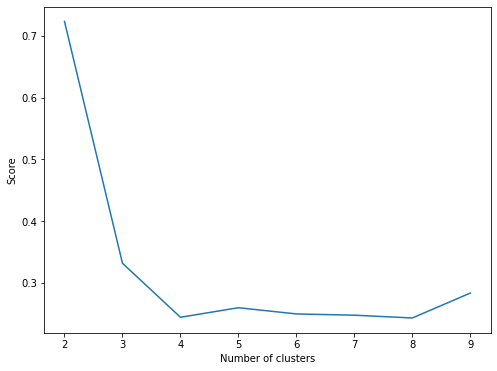

In [67]:
# Visualise scores
import matplotlib.pyplot as plt
fig, axis=plt.subplots(1,1, figsize=(8,6))
axis.plot(range(2,10), silhouette_score)
axis.set_xlabel('Number of clusters')
axis.set_ylabel('Score')

Silhouette Score: 0.7234172790092293
Silhouette Score: 0.33160803606310213
Silhouette Score: 0.24405840925051367
Silhouette Score: 0.25953821077188277
Silhouette Score: 0.2494680505931106
Silhouette Score: 0.24741753680948236
Silhouette Score: 0.24291180470239282
Silhouette Score: 0.28328919571540345
Silhouette Score: 0.3105733074347437
Silhouette Score: 0.31949857857372493
Silhouette Score: 0.28819886777368264
Silhouette Score: 0.3682986803166066
Silhouette Score: 0.35071589143070475


Text(0, 0.5, 'Score')

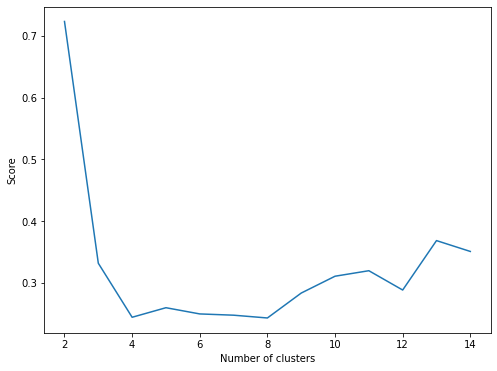

In [70]:
# Suggesting 9 clusters? 
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='PCAFeatures', metricName='silhouette')
for i in range(2,15):
    KMeans_model=KMeans(featuresCol='PCAFeatures', k=i)
    KMeans_fit=KMeans_model.fit(result)
    output=KMeans_fit.transform(result)
    
    score=evaluator.evaluate(output)
    silhouette_score.append(score)
    print("Silhouette Score:",score)

fig, axis=plt.subplots(1,1, figsize=(8,6))
axis.plot(range(2,15), silhouette_score)
axis.set_xlabel('Number of clusters')
axis.set_ylabel('Score')

In [71]:
# Without PCA
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='scaledFeatures', metricName='silhouette')
for i in range(2,10):
    KMeans_model=KMeans(featuresCol='scaledFeatures', k=i)
    KMeans_fit=KMeans_model.fit(scaled_features)
    output=KMeans_fit.transform(scaled_features)
    
    score=evaluator.evaluate(output)
    silhouette_score.append(score)
    print("Silhouette Score:",score)


Silhouette Score: 0.7091755657691248
Silhouette Score: 0.1784007996447161
Silhouette Score: 0.33900099388581606
Silhouette Score: 0.23185693917442285
Silhouette Score: 0.21866165252280284
Silhouette Score: 0.20845857182353553
Silhouette Score: 0.21222832763647184
Silhouette Score: 0.21309655000705022


Text(0, 0.5, 'Cost')

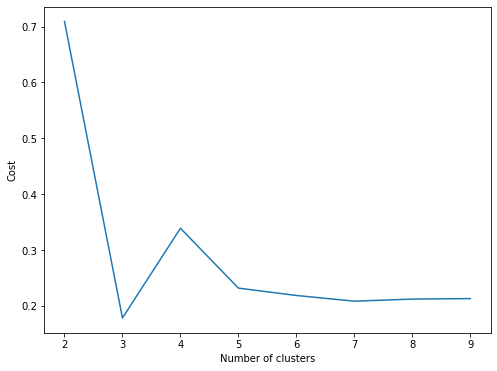

In [72]:
fig, axis=plt.subplots(1,1, figsize=(8,6))
axis.plot(range(2,10), silhouette_score)
axis.set_xlabel('Number of clusters')
axis.set_ylabel('Cost')